<a href="https://colab.research.google.com/github/dohyeonkim2526/Contest_Bigdata/blob/main/public_data_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **음주운전 데이터 시각화 (공공빅데이터 분석 공모전)**

# **Try1: 지역별 교통사고 현황 확인**
## **Importing data**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data='/content/gdrive/My Drive/공모전/공공 빅데이터 분석 공모전/서울시-음주사고(17,19년).xlsx'

In [ ]:
import pandas as pd
data=pd.read_excel(data)

In [ ]:
name_split=data['시군구'].str.split(" ")
data['행정구']=name_split.str.get(1)
data['행정동']=name_split.str.get(2)
del(data['시군구'])

In [ ]:
data['사고일시']=data['사고일시'].astype(str)

In [ ]:
import re
numbers=[]

for i in range(data.shape[0]):
  row=data.iloc[i]
  row_data=row['사고일시']
  num=re.findall("\d+", row_data)
  numbers.append(num)

In [ ]:
years=[]
months=[]
days=[]
hours=[]

for i in range(len(numbers)):
  row=numbers[i]
  year=row[0]     #numbers[i][0]
  month=row[1] #numbers[i][1]
  day=row[2]   #numbers[i][2]
  hour=row[3]  #numbers[i][3]
  years.append(year)
  months.append(month)
  days.append(day)
  hours.append(hour)

In [ ]:
data['발생년도']=years
data['발생(month)']=months
data['발생(day)']=days
data['발생(hour)']=hours

In [ ]:
data

,사고번호,사고일시,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,행정구,행정동,발생년도,발생(month),발생(day),발생(hour)
0,2017010100100046,2017년 1월 1일 02시,일요일,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,40세,상해없음,승용,남,52세,상해없음,강서구,화곡동,2017,1,1,02
1,2017010100100047,2017년 1월 1일 02시,일요일,경상사고,0,0,3,0,차대차 - 기타,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,승용,남,23세,상해없음,승용,남,54세,경상,강동구,길동,2017,1,1,02
2,2017010100100048,2017년 1월 1일 02시,일요일,경상사고,0,0,1,0,차대차 - 정면충돌,안전거리미확보,포장 - 건조,맑음,교차로 - 교차로안,승용,여,21세,상해없음,승용,남,59세,경상,송파구,문정동,2017,1,1,02
3,2017010100100049,2017년 1월 1일 02시,일요일,경상사고,0,0,1,0,차대차 - 정면충돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,47세,상해없음,승용,남,55세,상해없음,송파구,가락동,2017,1,1,02
4,2017010100100051,2017년 1월 1일 02시,일요일,경상사고,0,0,2,0,차대차 - 정면충돌,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,승용,남,27세,상해없음,승용,남,23세,경상,서초구,서초동,2017,1,1,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7904,2019123100100059,2019년 12월 31일 03시,화요일,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,48세,상해없음,승용,여,44세,경상,영등포구,양평동4가,2019,12,31,03
7905,2019123100100064,2019년 12월 31일 04시,화요일,중상사고,0,2,0,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,여,38세,상해없음,승용,여,28세,중상,강남구,역삼동,2019,12,31,04
7906,2019123100100194,2019년 12월 31일 11시,화요일,중상사고,0,1,0,0,차대차 - 측면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,27세,상해없음,화물,남,65세,중상,구로구,구로동,2019,12,31,11
7907,2019123100100395,2019년 12월 31일 17시,화요일,경상사고,0,0,1,0,차대사람 - 기타,기타,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,75세,상해없음,보행자,여,45세,경상,송파구,가락동,2019,12,31,17


## **교통사고 발생건수가 높은 상위 지역**
* 강남구, 송파구, 서초구, 영등포구, 마포구

In [ ]:
 data.groupby('행정구').size().sort_values(ascending=False) #구별 발생 건수 계산

행정구
강남구     1069
송파구      567
서초구      507
영등포구     465
마포구      461
강서구      369
구로구      341
노원구      316
관악구      288
용산구      279
강동구      259
동대문구     254
양천구      251
동작구      247
광진구      246
금천구      237
중랑구      236
성북구      230
성동구      225
은평구      225
강북구      222
종로구      181
도봉구      150
서대문구     145
중구       139
dtype: int64

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
plt.xkcd()
seoul=gpd.read_file('/content/gdrive/My Drive/공모전/공공 빅데이터 분석 공모전/seoul_municipalities_geo.json')

In [ ]:
seoul.head()

,SIG_CD,SIG_KOR_NM,SIG_ENG_NM,ESRI_PK,SHAPE_AREA,SHAPE_LEN,geometry
0,11320,도봉구,Dobong-gu,0,0.002110,0.239901,"POLYGON ((127.01985 37.70088, 127.02217 37.699..."
1,11380,은평구,Eunpyeong-gu,1,0.003041,0.327143,"POLYGON ((126.95174 37.65489, 126.95188 37.654..."
2,11230,동대문구,Dongdaemun-gu,2,0.001453,0.182837,"POLYGON ((127.07110 37.60733, 127.07119 37.606..."
3,11590,동작구,Dongjak-gu,3,0.001670,0.237796,"POLYGON ((126.95472 37.51604, 126.95556 37.515..."
4,11545,금천구,Geumcheon-gu,4,0.001325,0.211649,"POLYGON ((126.87994 37.48606, 126.88034 37.485..."


In [ ]:
plot_data=data.groupby('행정구').size().sort_values(ascending=False)
plot_data=pd.DataFrame(plot_data)

In [ ]:
plot_data.reset_index(inplace=True)
plot_data.rename(columns={0:'발생건수', '행정구' :'SIG_KOR_NM'}, inplace=True)

In [ ]:
plot_data.head()

,SIG_KOR_NM,발생건수
0,강남구,1069
1,송파구,567
2,서초구,507
3,영등포구,465
4,마포구,461


In [ ]:
plot_data=pd.merge(seoul,plot_data,on='SIG_KOR_NM')

In [ ]:
plot_data['sum']=plot_data['SIG_KOR_NM'].map(str) + '\n' + plot_data['발생건수'].map(str) + '건'
plot_data.head()

,SIG_CD,SIG_KOR_NM,SIG_ENG_NM,ESRI_PK,SHAPE_AREA,SHAPE_LEN,geometry,발생건수,sum
0,11320,도봉구,Dobong-gu,0,0.002110,0.239901,"POLYGON ((127.01985 37.70088, 127.02217 37.699...",150,도봉구\n150건
1,11380,은평구,Eunpyeong-gu,1,0.003041,0.327143,"POLYGON ((126.95174 37.65489, 126.95188 37.654...",225,은평구\n225건
2,11230,동대문구,Dongdaemun-gu,2,0.001453,0.182837,"POLYGON ((127.07110 37.60733, 127.07119 37.606...",254,동대문구\n254건
3,11590,동작구,Dongjak-gu,3,0.001670,0.237796,"POLYGON ((126.95472 37.51604, 126.95556 37.515...",247,동작구\n247건
4,11545,금천구,Geumcheon-gu,4,0.001325,0.211649,"POLYGON ((126.87994 37.48606, 126.88034 37.485...",237,금천구\n237건


In [ ]:
plot_data.head()

,SIG_CD,SIG_KOR_NM,SIG_ENG_NM,ESRI_PK,SHAPE_AREA,SHAPE_LEN,geometry,발생건수,sum
0,11320,도봉구,Dobong-gu,0,0.002110,0.239901,"POLYGON ((127.01985 37.70088, 127.02217 37.699...",150,도봉구\n150건
1,11380,은평구,Eunpyeong-gu,1,0.003041,0.327143,"POLYGON ((126.95174 37.65489, 126.95188 37.654...",225,은평구\n225건
2,11230,동대문구,Dongdaemun-gu,2,0.001453,0.182837,"POLYGON ((127.07110 37.60733, 127.07119 37.606...",254,동대문구\n254건
3,11590,동작구,Dongjak-gu,3,0.001670,0.237796,"POLYGON ((126.95472 37.51604, 126.95556 37.515...",247,동작구\n247건
4,11545,금천구,Geumcheon-gu,4,0.001325,0.211649,"POLYGON ((126.87994 37.48606, 126.88034 37.485...",237,금천구\n237건


## **각 지역의 연도별 교통사고 피해 건수 시각화**
* 본 프로젝트에서는 부상자의 수가 교통사고 피해 정도와 비례한다고 설정
* 부상자 = 중상자 + 경상자 + 부상신고자 + 사망자

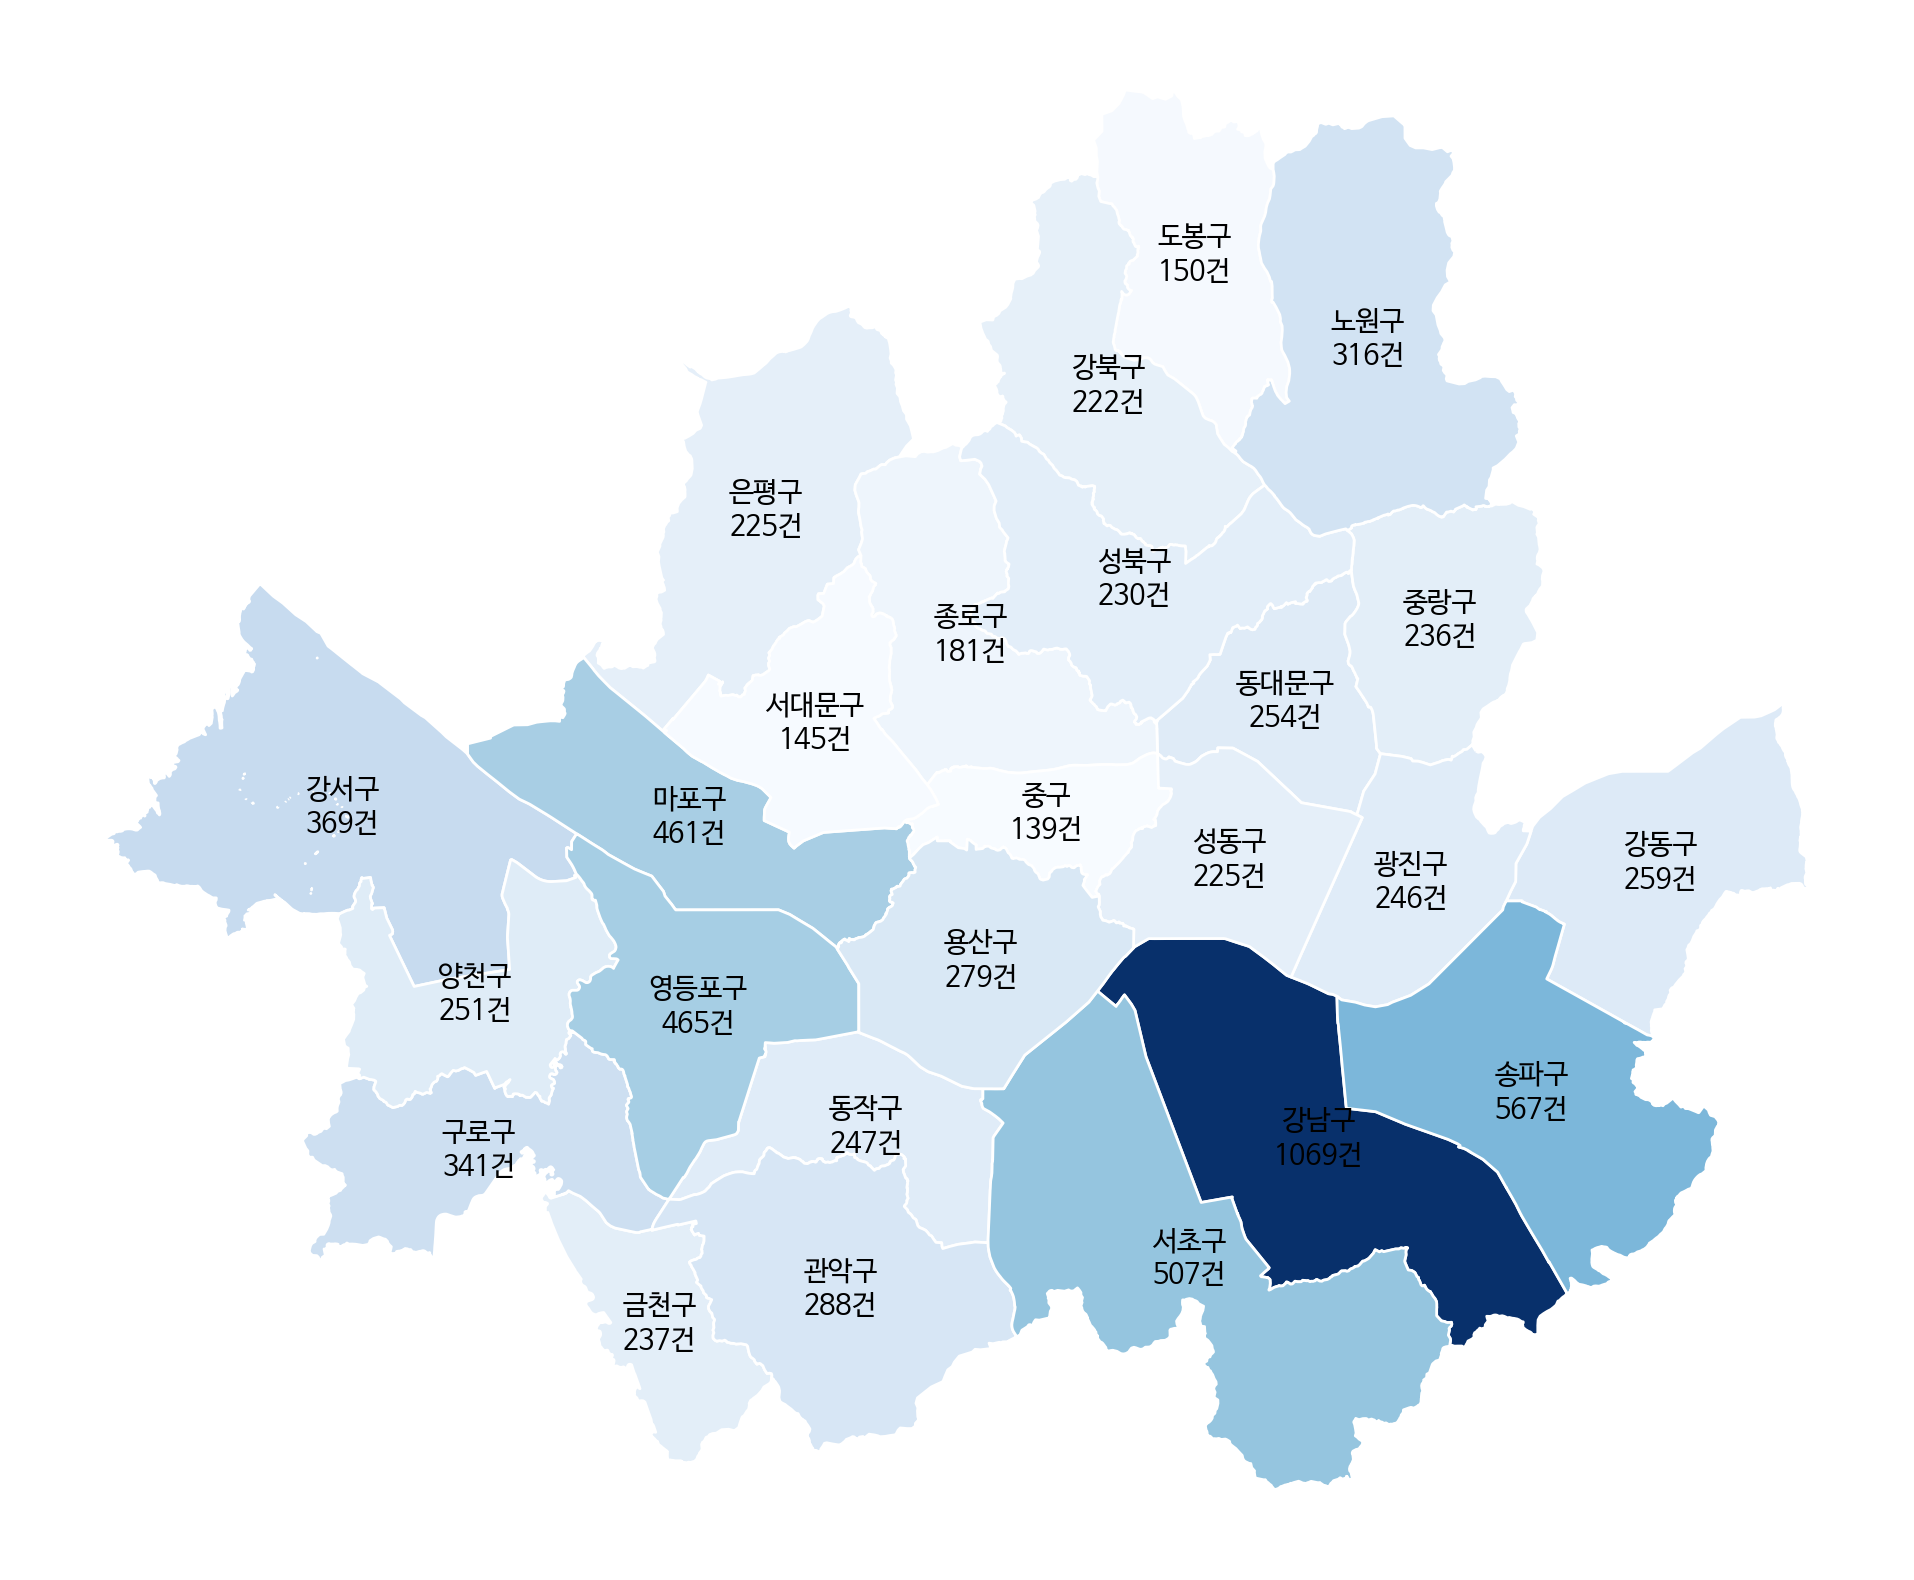

In [ ]:
pic=plot_data.plot(figsize=(13,10),linewidth=1, edgecolor='white', column='발생건수',cmap='Blues')
%config InlineBackend.figure_format = 'retina'

for index,row in plot_data.iterrows():
    xy=row['geometry'].centroid.coords[:]
    xytext=row['geometry'].centroid.coords[:]
    plt.annotate(row['sum'],xy=xy[0], xytext=xytext[0],  horizontalalignment='center',verticalalignment='center')
    plt.axis('off')

plt.rc('font', family='NanumBarunGothic') 
plt.show()

In [ ]:
df_dict = {k: v for k, v in data.groupby('행정구')}

In [ ]:
df_강남구 = df_dict['강남구']
df_송파구 = df_dict['송파구']
df_서초구 = df_dict['서초구']
df_영등포구 = df_dict['영등포구']
df_마포구 = df_dict['마포구']

In [ ]:
df_강남구

,사고번호,사고일시,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,행정구,행정동,발생년도,발생(month),발생(day),발생(hour)
12,2017010100100421,2017년 1월 1일 23시,일요일,경상사고,0,0,1,0,차대사람 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,여,40세,상해없음,보행자,남,26세,경상,강남구,역삼동,2017,1,1,23
13,2017010100100422,2017년 1월 1일 23시,일요일,중상사고,0,3,2,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,53세,상해없음,승용,남,43세,중상,강남구,개포동,2017,1,1,23
14,2017010200100021,2017년 1월 2일 00시,월요일,경상사고,0,0,1,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,34세,상해없음,승용,남,43세,상해없음,강남구,신사동,2017,1,2,00
17,2017010200100079,2017년 1월 2일 07시,월요일,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,남,44세,경상,강남구,수서동,2017,1,2,07
39,2017010600100125,2017년 1월 6일 08시,금요일,경상사고,0,0,2,0,차대차 - 추돌,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,승용,남,23세,상해없음,승용,여,42세,경상,강남구,도곡동,2017,1,6,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7888,2019122900100073,2019년 12월 29일 05시,일요일,경상사고,0,0,6,1,차대차 - 측면충돌,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,52세,상해없음,승합,남,49세,경상,강남구,신사동,2019,12,29,05
7889,2019122900100074,2019년 12월 29일 05시,일요일,경상사고,0,0,1,0,차대차 - 정면충돌,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,29세,상해없음,승용,남,40세,경상,강남구,대치동,2019,12,29,05
7894,2019122900100435,2019년 12월 29일 22시,일요일,경상사고,0,0,1,0,차대차 - 기타,신호위반,포장 - 젖음/습기,비,기타 - 기타,승용,여,45세,상해없음,이륜,남,54세,경상,강남구,역삼동,2019,12,29,22
7899,2019123100100022,2019년 12월 31일 00시,화요일,경상사고,0,0,2,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,여,36세,상해없음,승용,남,58세,경상,강남구,신사동,2019,12,31,00


In [ ]:
df_강남구['사고유형'].unique()

array(['차대사람 - 기타', '차대차 - 추돌', '차대차 - 기타', '차대차 - 정면충돌', '차대차 - 측면충돌',
       '차대사람 - 횡단중', '차대차 - 후진중충돌', '차량단독 - 전도전복', '차대사람 - 길가장자리구역통행중',
       '차대사람 - 보도통행중', '차량단독 - 공작물충돌', '차대사람 - 차도통행중', '차량단독 - 기타'],
      dtype=object)

In [ ]:
def name_split(df):
  name=df['사고유형'].str.split(" - ")
  df['사고유형(대분류)']=name.str.get(0)
  df=df.drop(['사고일시','사고번호','사고유형'],axis=1)
  return df

In [ ]:
rank1=name_split(df_강남구)
rank2=name_split(df_송파구)
rank3=name_split(df_서초구)
rank4=name_split(df_영등포구)
rank5=name_split(df_마포구)

In [ ]:
def total(df):
  df['부상자수']=df['중상자수']+df['경상자수']+df['부상신고자수']+df['사망자수'] #중상자, 경상자, 부상신고자, 사망자 수를 모두 합침 >> 총 부상자를 고려하고 이후에 사망관련 사고는 더 높은 가중치 부여할 예정
  df=df.drop(['중상자수','경상자수','부상신고자수','사고내용'],axis=1)
  df[['발생년도','발생(month)','발생(day)','발생(hour)','부상자수']]=df[['발생년도','발생(month)','발생(day)','발생(hour)','부상자수']].astype(str).astype(int)
  return df

In [ ]:
rank1=total(rank1)
rank2=total(rank2)
rank3=total(rank3)
rank4=total(rank4)
rank5=total(rank5)

In [ ]:
#df_강남구.sort_values(by='발생(month)')
rank1

,요일,사망자수,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,행정구,행정동,발생년도,발생(month),발생(day),발생(hour),사고유형(대분류),부상자수
12,일요일,0,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,여,40세,상해없음,보행자,남,26세,경상,강남구,역삼동,2017,1,1,23,차대사람,1
13,일요일,0,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,53세,상해없음,승용,남,43세,중상,강남구,개포동,2017,1,1,23,차대차,5
14,월요일,0,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,34세,상해없음,승용,남,43세,상해없음,강남구,신사동,2017,1,2,0,차대차,1
17,월요일,0,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,남,44세,경상,강남구,수서동,2017,1,2,7,차대차,1
39,금요일,0,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,승용,남,23세,상해없음,승용,여,42세,경상,강남구,도곡동,2017,1,6,8,차대차,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7888,일요일,0,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,52세,상해없음,승합,남,49세,경상,강남구,신사동,2019,12,29,5,차대차,7
7889,일요일,0,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,29세,상해없음,승용,남,40세,경상,강남구,대치동,2019,12,29,5,차대차,1
7894,일요일,0,신호위반,포장 - 젖음/습기,비,기타 - 기타,승용,여,45세,상해없음,이륜,남,54세,경상,강남구,역삼동,2019,12,29,22,차대차,1
7899,화요일,0,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,여,36세,상해없음,승용,남,58세,경상,강남구,신사동,2019,12,31,0,차대차,2


## **Pivot table**
* 각 지역의 연도별 부상자수를 파악하는 것이 목적
* 그룹별 특징을 파악해야 하므로 가장 적합화된 pivot table 사용

In [ ]:
def total_for_graph(pv):
  pivot=pv.pivot_table(values="부상자수", index="발생(month)", columns="발생년도", aggfunc=sum)
  pivot['Total'] = pivot[2017]+pivot[2018]+pivot[2019]
  return pivot

In [ ]:
pivot1=total_for_graph(rank1)
pivot2=total_for_graph(rank2)
pivot3=total_for_graph(rank3)
pivot4=total_for_graph(rank4)
pivot5=total_for_graph(rank5)

In [ ]:
pivot1 #강남구-년도별 발생건수(기준:월)

발생년도,2017,2018,2019,Total
발생(month),,,,
1,77,90,61,228
2,59,51,19,129
3,70,63,51,184
4,52,59,45,156
5,55,41,46,142
6,46,44,53,143
7,50,58,40,148
8,54,69,35,158
9,50,54,30,134


## **Pivot table Visualization**
* (전반적으로) 사고가 감소하는 기간 : 3~5월
* 사고가 증가하는 기간 : 11~1월
* 사고가 증가하는 "겨울"에는 날씨 영향도 존재할 것이라 가정하여 도로 노면 상태를 시각화 하고자 하였다.

<Figure size 432x288 with 0 Axes>

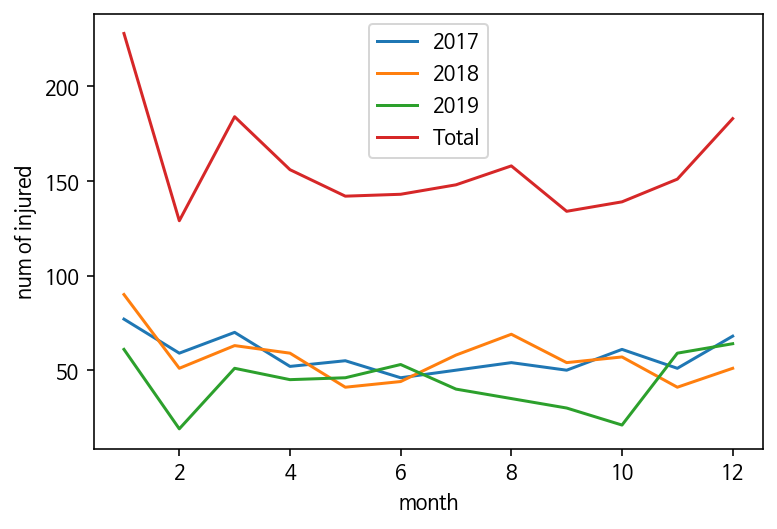

<Figure size 432x288 with 0 Axes>

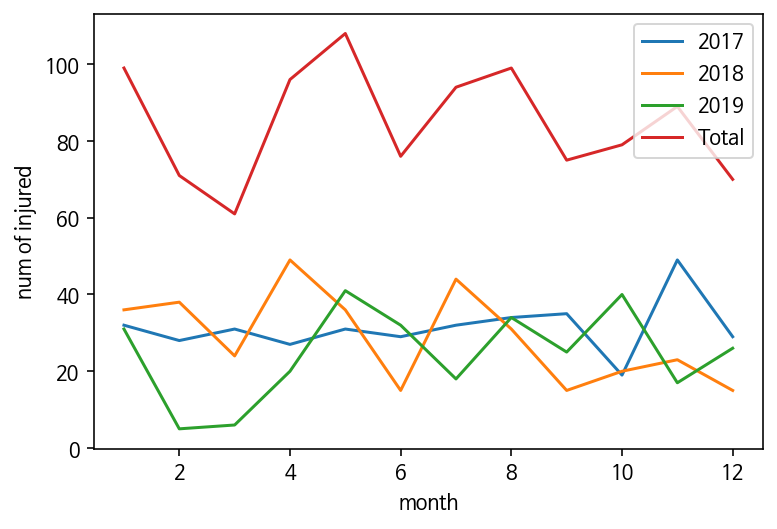

<Figure size 432x288 with 0 Axes>

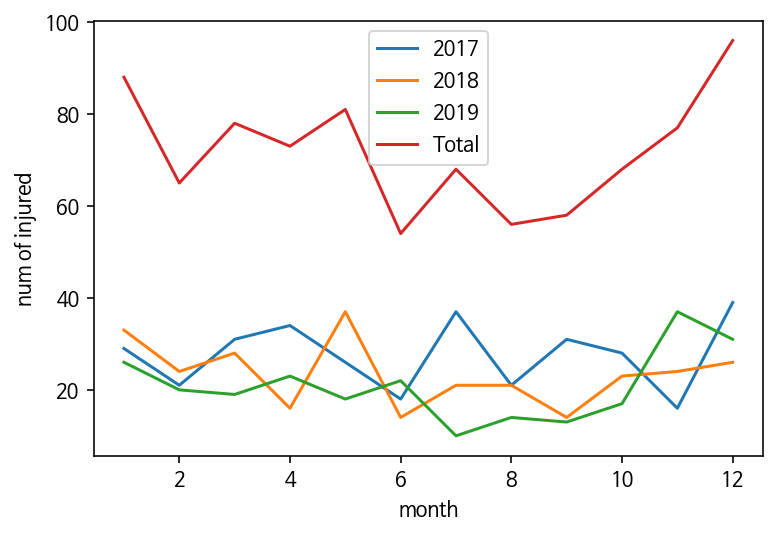

<Figure size 432x288 with 0 Axes>

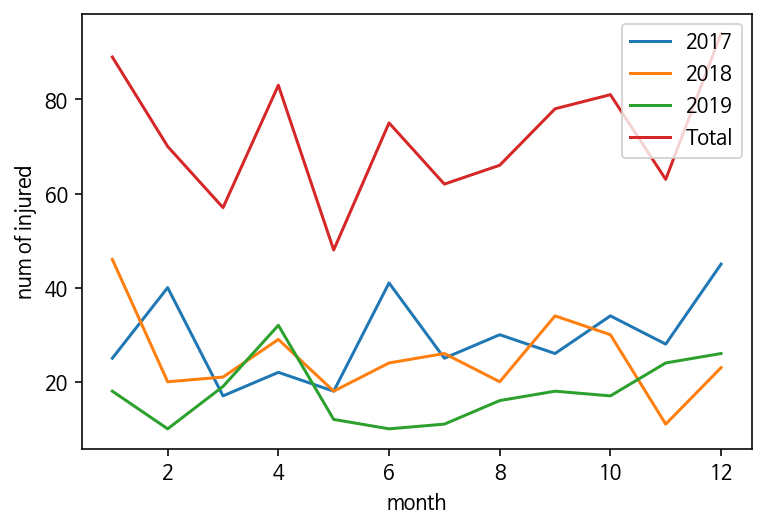

<Figure size 432x288 with 0 Axes>

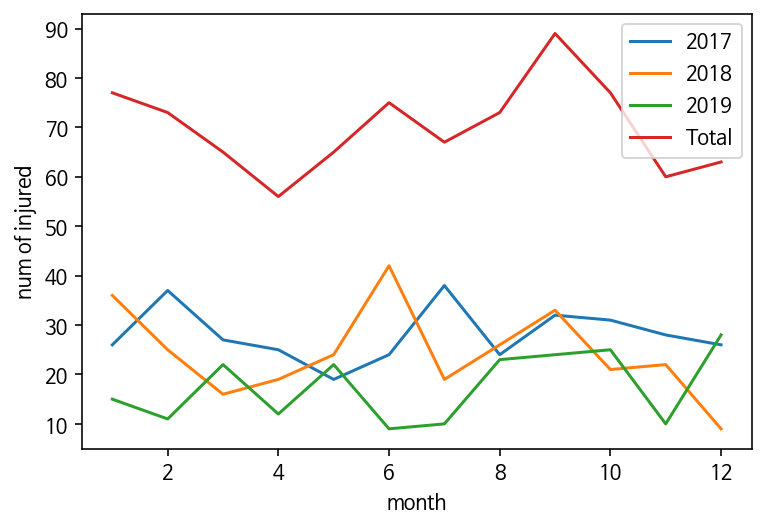

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1)
plot=pivot1.plot()
plot.set_xlabel("month")
plot.set_ylabel("num of injured")
plot.legend()
plt.show()

plt.figure(2)
plot=pivot2.plot()
plot.set_xlabel("month")
plot.set_ylabel("num of injured")
plot.legend()
plt.show()

plt.figure(3)
plot=pivot3.plot()
plot.set_xlabel("month")
plot.set_ylabel("num of injured")
plot.legend()
plt.show()

plt.figure(4)
plot=pivot4.plot()
plot.set_xlabel("month")
plot.set_ylabel("num of injured")
plot.legend()
plt.show()

plt.figure(5)
plot=pivot5.plot()
plot.set_xlabel("month")
plot.set_ylabel("num of injured")
plot.legend()
plt.show()

## **Try2: 도로 노면과 교통사고 관계 시각화**
* 월별 도로 노면 상태와 교통사고 건수를 시각화
* rank 1~5 : 강남구, 송파구, 서초구, 영등포구, 마포구 순



In [ ]:
def pivot2(pv):
  pivot=pv.pivot_table(values="부상자수",index="발생(month)",columns="노면상태",aggfunc=sum)
  pivot=pivot.fillna(0)
  return pivot

pivot_21=pivot2(rank1)
pivot_22=pivot2(rank2)
pivot_23=pivot2(rank3)
pivot_24=pivot2(rank4)
pivot_25=pivot2(rank5)

In [ ]:
pivot_21.sum() #포장-건조, 포장-기타, 포장-젖음/습기

노면상태
비포장 - 기타          2.0
비포장 - 서리/결빙       1.0
포장 - 건조        1560.0
포장 - 기타         123.0
포장 - 서리/결빙        8.0
포장 - 적설           6.0
포장 - 젖음/습기      194.0
포장 - 침수           1.0
dtype: float64

In [ ]:
pivot_22.sum() #포장-건조, 포장-젖음/습기

노면상태
포장 - 건조       884.0
포장 - 서리/결빙      1.0
포장 - 적설         1.0
포장 - 젖음/습기    131.0
dtype: float64

In [ ]:
pivot_23.sum() #포장-건조, 포장-기타, 포장-젖음/습기

노면상태
포장 - 건조       725.0
포장 - 기타        23.0
포장 - 서리/결빙      2.0
포장 - 적설         1.0
포장 - 젖음/습기    111.0
dtype: float64

In [ ]:
pivot_24.sum() #포장-건조, 포장-젖음/습기

노면상태
포장 - 건조       734.0
포장 - 서리/결빙      3.0
포장 - 적설         3.0
포장 - 젖음/습기    126.0
dtype: float64

In [ ]:
pivot_25.sum() #포장-건조, 포장-기타, 포장-젖음/습기

노면상태
포장 - 건조       733.0
포장 - 기타        42.0
포장 - 적설         1.0
포장 - 젖음/습기     64.0
dtype: float64

* (포장 - 건조 / 포장 - 기타 / 포장 - 젖음, 습기)를 제외하고는 row 수가 매우 적으므로 변수에서 제외

In [ ]:
#송파구(pivot_22) ,영등포구(pivot_24)를 기준으로는 '포장-기타' feature가 없으므로 0 값으로 채워넣어준다.
pivot_22['포장 - 기타'] = 0
pivot_24['포장 - 기타'] = 0

In [ ]:
pivot_21

노면상태,비포장 - 기타,비포장 - 서리/결빙,포장 - 건조,포장 - 기타,포장 - 서리/결빙,포장 - 적설,포장 - 젖음/습기,포장 - 침수
발생(month),,,,,,,,
1,0.0,1.0,199.0,13.0,6.0,4.0,5.0,0.0
2,0.0,0.0,108.0,6.0,0.0,0.0,15.0,0.0
3,2.0,0.0,157.0,9.0,0.0,0.0,16.0,0.0
4,0.0,0.0,126.0,8.0,0.0,0.0,22.0,0.0
5,0.0,0.0,120.0,7.0,0.0,0.0,15.0,0.0
6,0.0,0.0,123.0,8.0,0.0,0.0,12.0,0.0
7,0.0,0.0,100.0,18.0,0.0,0.0,30.0,0.0
8,0.0,0.0,121.0,13.0,0.0,0.0,23.0,1.0
9,0.0,0.0,109.0,8.0,0.0,0.0,17.0,0.0


In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
def revise_make_pivot2(pv):
  pivot=pv[['포장 - 건조', '포장 - 기타', '포장 - 젖음/습기']]
  plt.figure()
  ax=pivot.plot.barh(stacked=True)
  ax.set_xlabel("num of injured") #ax.set_xlabel("num of injured",fontproperties=fontprop)
  ax.set_ylabel("month") #ax.set_ylabel("month", fontproperties=fontprop)
  ax.legend()
  plt.show()

### **Visualization & Correlation**
* 시각화 순서: 강남구, 송파구, 서초구, 영등포구, 마포구 순

<Figure size 432x288 with 0 Axes>

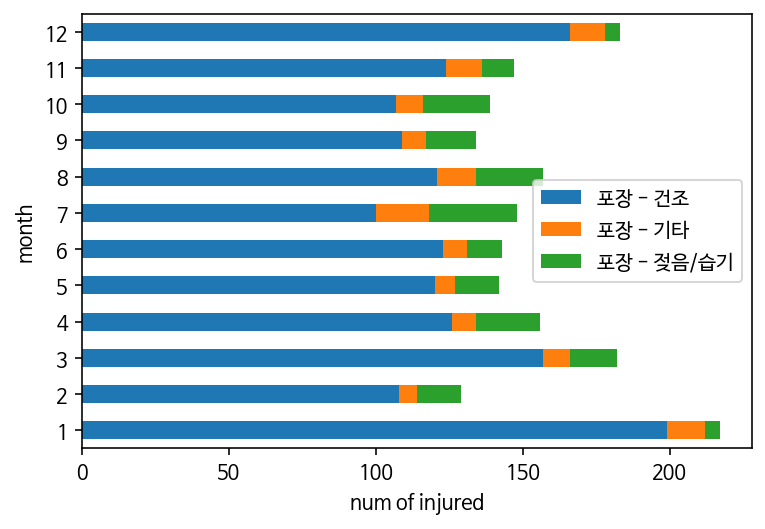

<Figure size 432x288 with 0 Axes>

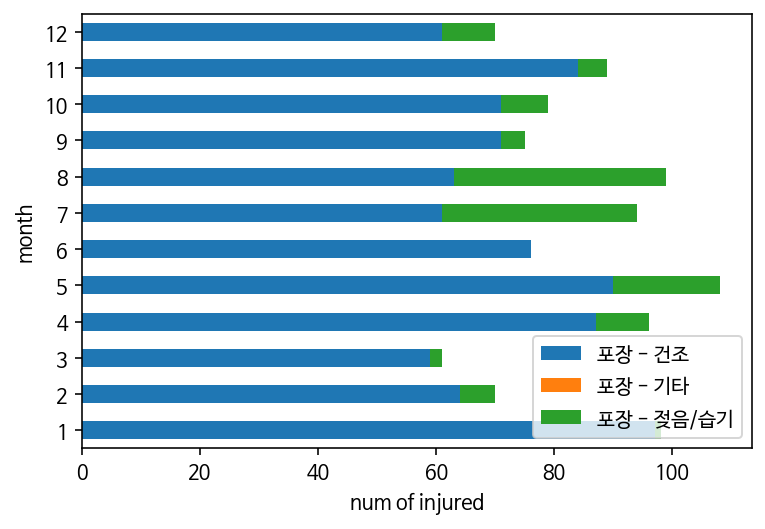

<Figure size 432x288 with 0 Axes>

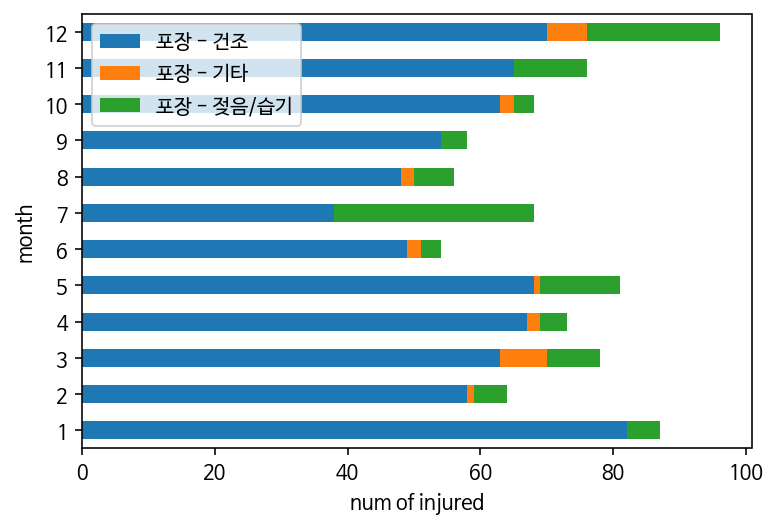

<Figure size 432x288 with 0 Axes>

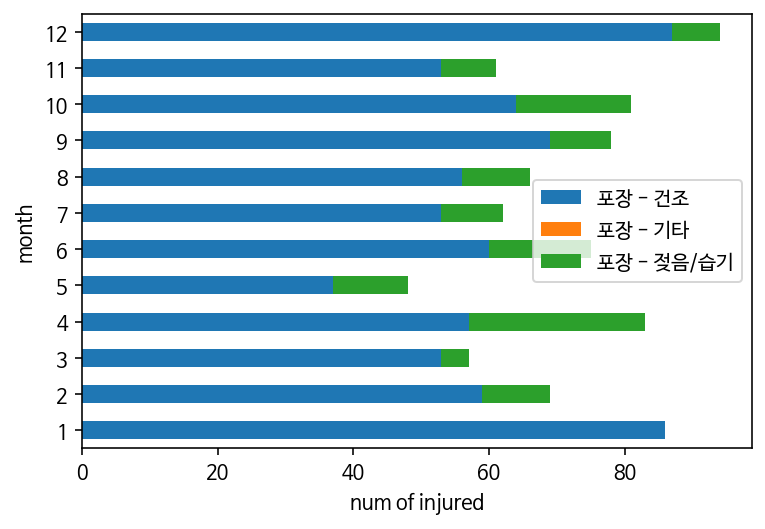

<Figure size 432x288 with 0 Axes>

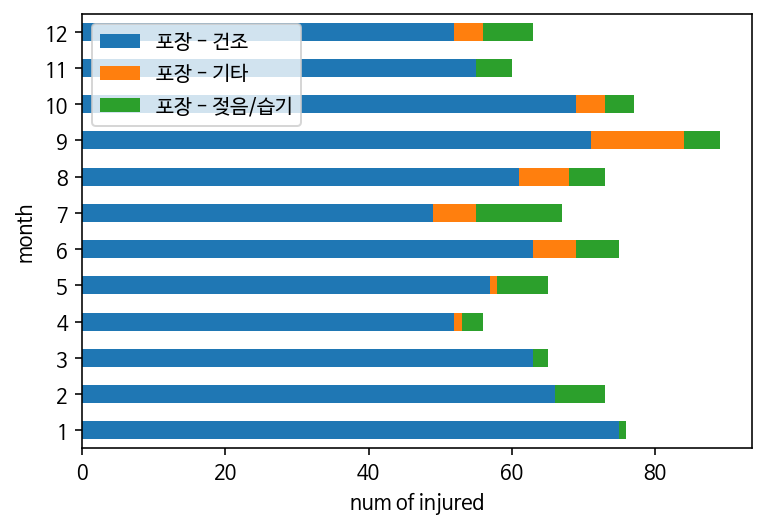

In [ ]:
revise_make_pivot2(pivot_21)
revise_make_pivot2(pivot_22)
revise_make_pivot2(pivot_23)
revise_make_pivot2(pivot_24)
revise_make_pivot2(pivot_25)

In [ ]:
def coeff(data, rank):
  data['부상자수']=data.sum(axis=1)

  if rank==1:
    result=rank1

  elif rank==2:
    result=rank2
  
  elif rank==3:
    result=rank3

  elif rank==4:
    result=rank4
  
  else:
    result=rank5

  train=result[result['노면상태']=='포장 - 젖음/습기']
  train=train['노면상태'].groupby(train['발생(month)']).count()
  train=pd.DataFrame(train)
  train.rename(columns={'노면상태':'발생횟수'},inplace=True)

  train2=result.pivot_table(values="부상자수", index="발생(month)", columns="노면상태",aggfunc=sum)
  train2=train2['포장 - 젖음/습기']
  train2=pd.DataFrame(train2)
    
  train3=pd.concat([train,train2],axis=1)  #[0]: 젖음/습기가 발생한 횟수, [1]: 총 부상자수
  train3.rename(columns={'발생횟수':'count', '포장 - 젖음/습기':'injured'},inplace=True)  

  return train3 

In [ ]:
#(상위 5개 지역) 비오는 날에 발생한 부상자수
#2017~2019기준
#포장 - 젖음/습기 : 비오는 날이라고 판단
coeff1=coeff(pivot_21,1)
coeff2=coeff(pivot_22,2)
coeff3=coeff(pivot_23,3)
coeff4=coeff(pivot_24,4)
coeff5=coeff(pivot_25,5)

In [ ]:
coeff4=coeff4.fillna(0)
coeff2=coeff2.fillna(0)
COEFF=coeff1+coeff2+coeff3+coeff4+coeff5

In [ ]:
import scipy.stats as stats
COEFF.corr(method='pearson')

,count,injured
count,1.000000,0.970719
injured,0.970719,1.000000


## **Result**
* 처음에는 악천후(젖음/습기)가 사고에 많은 영향을 줄 것으로 가정하였다.
* 실제 Pivot table 시각화는 연관성을 찾기 어려웠고, 지역별 교통사고 발생 건수가 다른 점을 이용하여 상관관계도 확인해보았다.
* (젖음/습한 노면 - 교통사고 발생)의 상관관계가 0.97로 발견되었지만 이 결과 만으로 인과관계를 설정하기엔 부족했다.
* 이에 유동인구와 음주운전의 관계성을 확인해보게 되었다.


# **Try3: 유동인구와 교통사고 관계 시각화**

In [ ]:
traffic='/content/gdrive/My Drive/공모전/공공 빅데이터 분석 공모전/유동인구.xlsx'

In [ ]:
traffic=pd.read_excel(traffic)

In [ ]:
traffic=traffic.drop(['Unnamed: 0','Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', '가해운전자 차종','가해운전자 성별','가해운전자 상해정도','피해운전자 차종','피해운전자 성별','피해운전자 상해정도', '사고번호'], axis=1)

In [ ]:
traffic['부상자수']=traffic['중상자수']+traffic['경상자수']+traffic['부상신고자수']+traffic['사망자수']
traffic=traffic.drop(['중상자수', '경상자수', '부상신고자수','사망자수'],axis=1)

In [ ]:
import re
numbers=[]

for i in range(data.shape[0]):
  row=traffic.iloc[i]
  row_data=row['사고일시']
  num=re.findall("\d+", row_data)
  numbers.append(num)

years=[]
months=[]
days=[]
hours=[]

for i in range(len(numbers)):
  row=numbers[i]
  year=row[0]     #numbers[i][0]
  month=row[1] #numbers[i][1]
  day=row[2]   #numbers[i][2]
  hour=row[3]  #numbers[i][3]
  years.append(year)
  months.append(month)
  days.append(day)
  hours.append(hour)

In [ ]:
traffic['발생년도']=years
traffic['발생(month)']=months
traffic['발생(day)']=days
traffic['발생(hour)']=hours

In [ ]:

name=traffic['사고유형'].str.split(" - ")
traffic['사고유형(대분류)']=name.str.get(0)

traffic=traffic.drop(['사고유형','사고일시','기상상태','도로형태'],axis=1)

In [ ]:
taffic=traffic.fillna(0)

In [ ]:
cols = traffic.columns[7:36]

for col in cols:
    traffic[col]=traffic[col].round(0)

In [ ]:
#traffic.groupby(['발생(hour)']).mean()

In [ ]:
tr_dict={k:v for k,v in traffic.groupby('시군구')}

tr_rank1 = tr_dict['강남구']
tr_rank2 = tr_dict['송파구']
tr_rank3 = tr_dict['서초구']
tr_rank4 = tr_dict['영등포구']
tr_rank5 = tr_dict['마포구']

In [ ]:
tr_rank1[:1]

,요일,시군구,사고내용,법규위반,노면상태,가해운전자 연령,피해운전자 연령,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,남자50세부터54세생활인구수,남자55세부터59세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자0세부터9세생활인구수,여자10세부터14세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,부상자수,발생년도,발생(month),발생(day),발생(hour),사고유형(대분류)
12,일요일,강남구,경상사고,안전운전불이행,포장 - 건조,40세,26세,659400.0,16543.0,10414.0,18596.0,22600.0,26555.0,28495.0,30137.0,26632.0,31038.0,22692.0,20719.0,19554.0,14871.0,30160.0,16902.0,10419.0,17500.0,23542.0,29330.0,28564.0,29429.0,26772.0,28644.0,21957.0,23798.0,23570.0,18677.0,41291.0,1,2017,1,1,23,차대사람


In [ ]:
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams['font.family'] = 'NanumGothic'

## **유동인구 Visualization**
* 평일 특징: 모든 지역에서 목, 금요일 유동인구가 집중되는 경향
* 주말 특징: 주중에 비해 10-30대들의 유동인구가 밀집

In [ ]:
def sns_day(new,title):
  import seaborn as sns
  
  plt.figure(figsize=(8,6))
  min_max_scaler=preprocessing.MinMaxScaler()
  plot=min_max_scaler.fit_transform(new)
  plot=pd.DataFrame(plot, index=new.index, columns=new.columns)
  result=sns.heatmap(plot, vmin=0, vmax=1, cbar=True, cmap="YlGnBu",linecolor='white', linewidths=0.5, annot_kws={"fontweight":'bold',"size":12}, annot=True, fmt='.2f')
  plt.title(title, fontsize=15)
  plt.show() 

In [ ]:
def sns_pv_day(data,title):
  t=title
  tr_people_rank=data.groupby(['요일']).mean()
  tr_people_rank=pd.DataFrame(tr_people_rank)
  tr_people_rank=tr_people_rank.reindex(index=['월요일','화요일','수요일','목요일','금요일','토요일','일요일'])
  tr_people_rank=tr_people_rank.drop(['총생활인구수','부상자수'],axis=1)
  new=pd.DataFrame()
  new=new_df(new,tr_people_rank)
  sns_day(new,t)

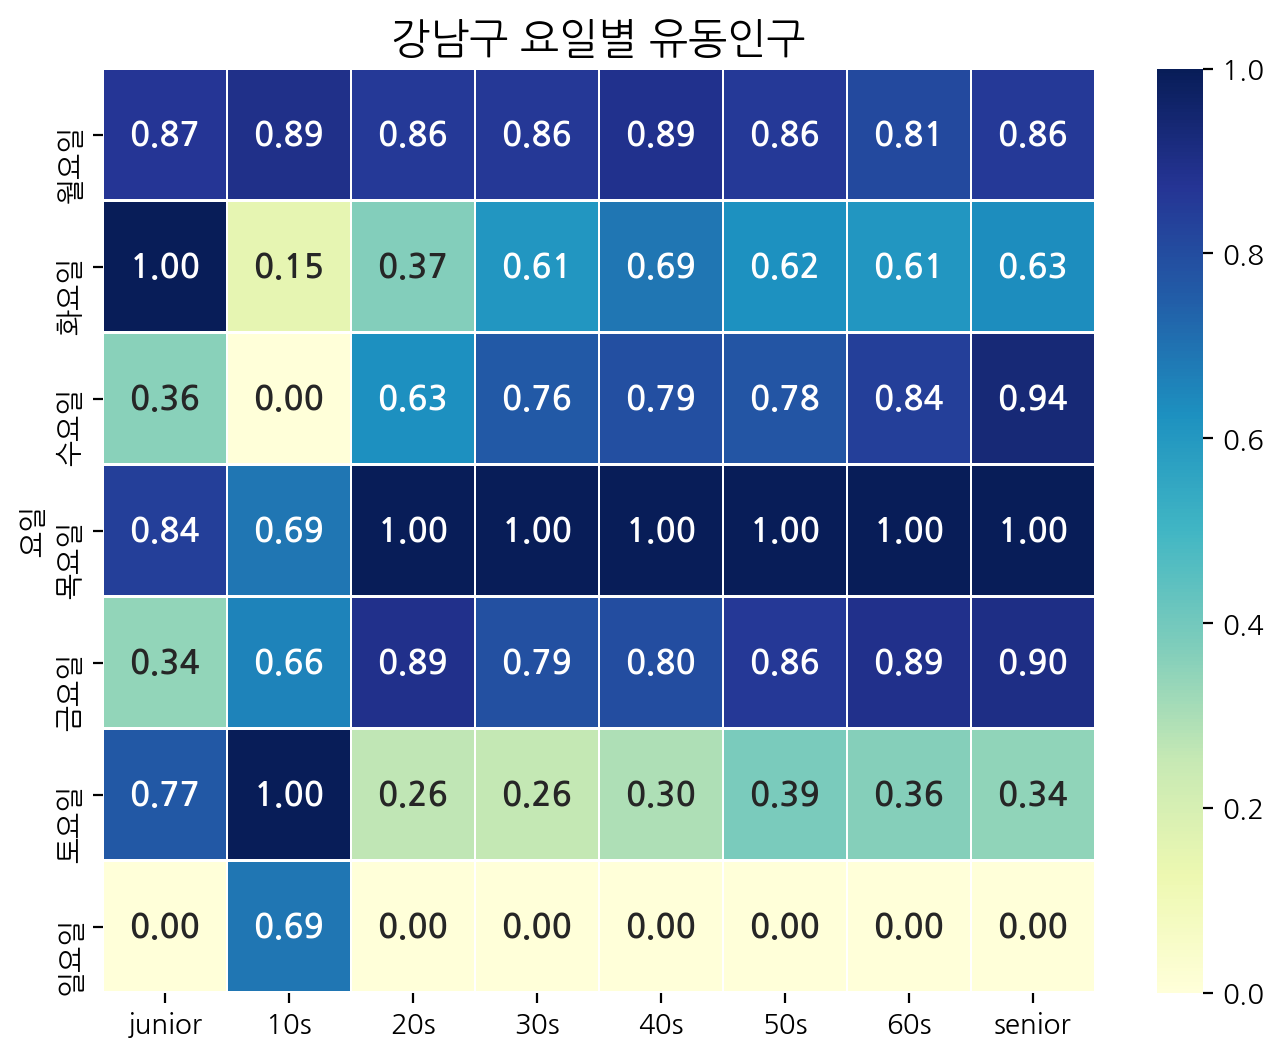

In [ ]:
sns_pv_day(tr_rank1,'강남구 요일별 유동인구')

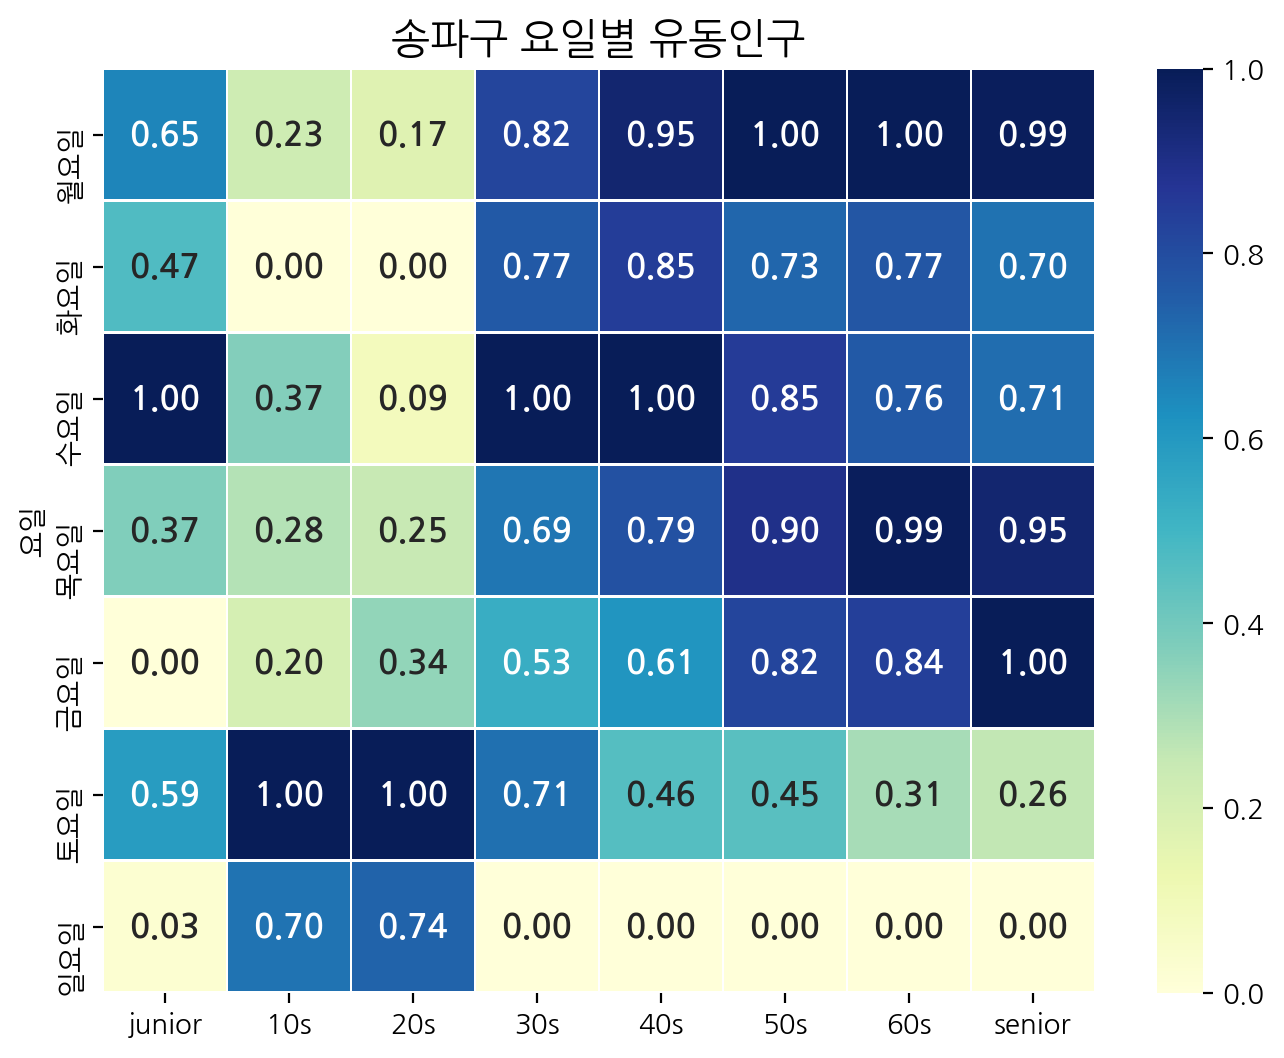

In [ ]:
sns_pv_day(tr_rank2,'송파구 요일별 유동인구')

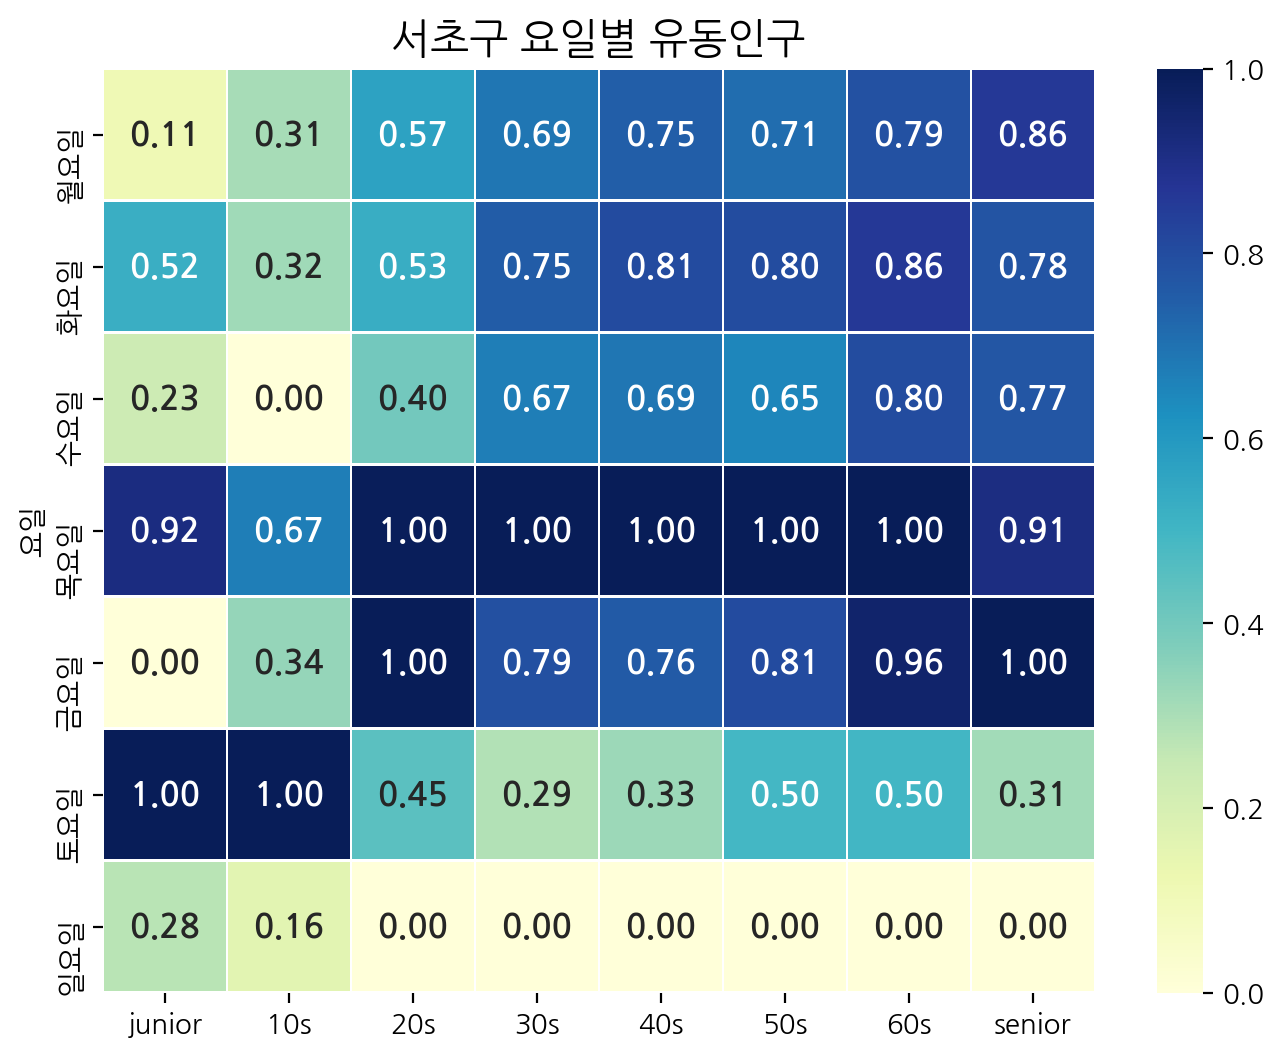

In [ ]:
sns_pv_day(tr_rank3,'서초구 요일별 유동인구')

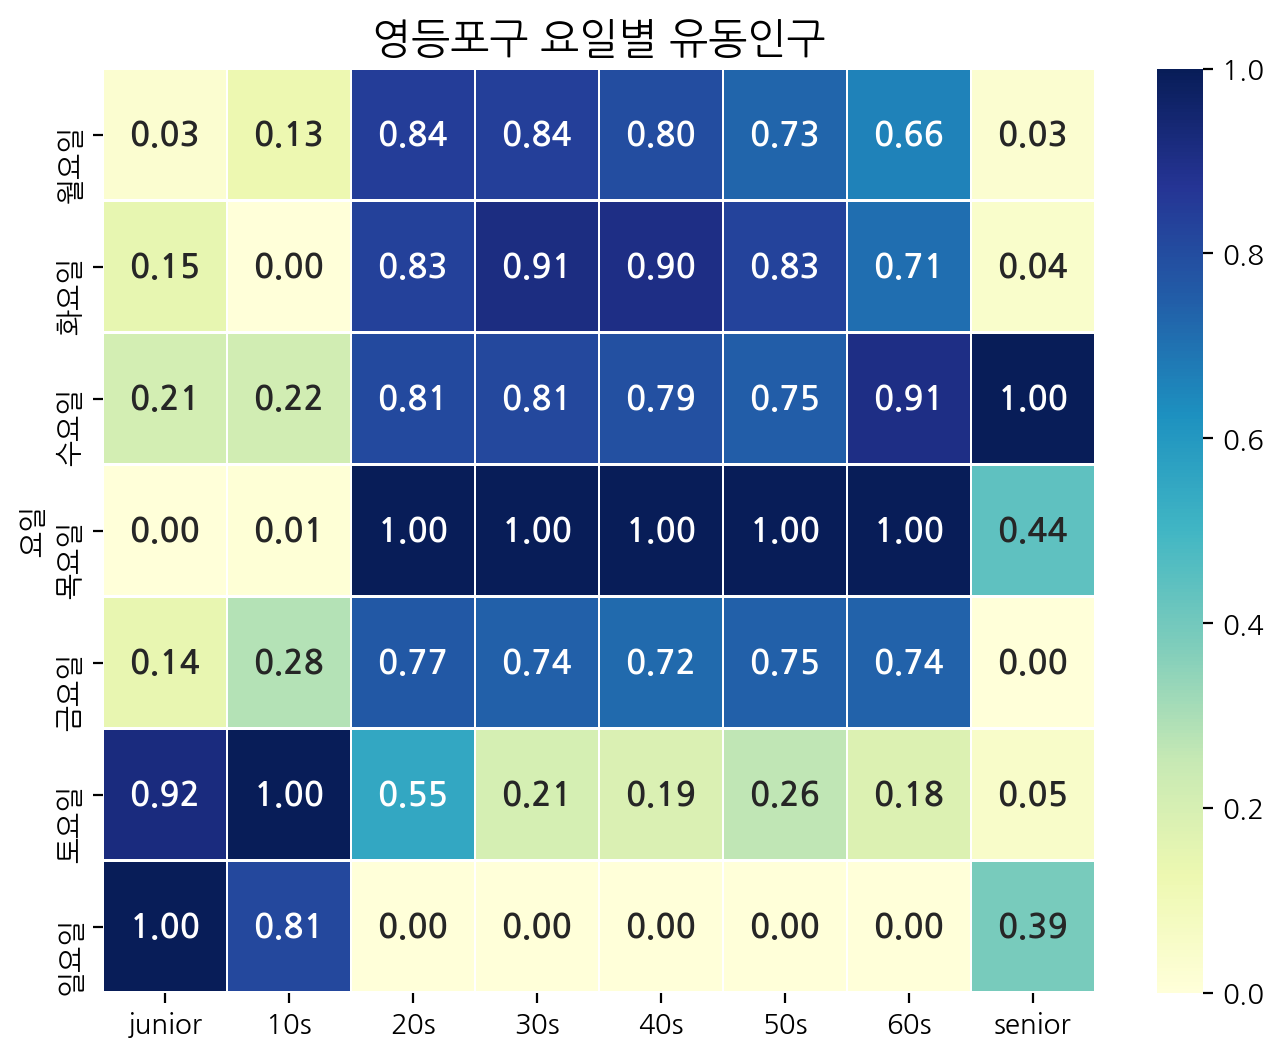

In [ ]:
sns_pv_day(tr_rank4,'영등포구 요일별 유동인구')

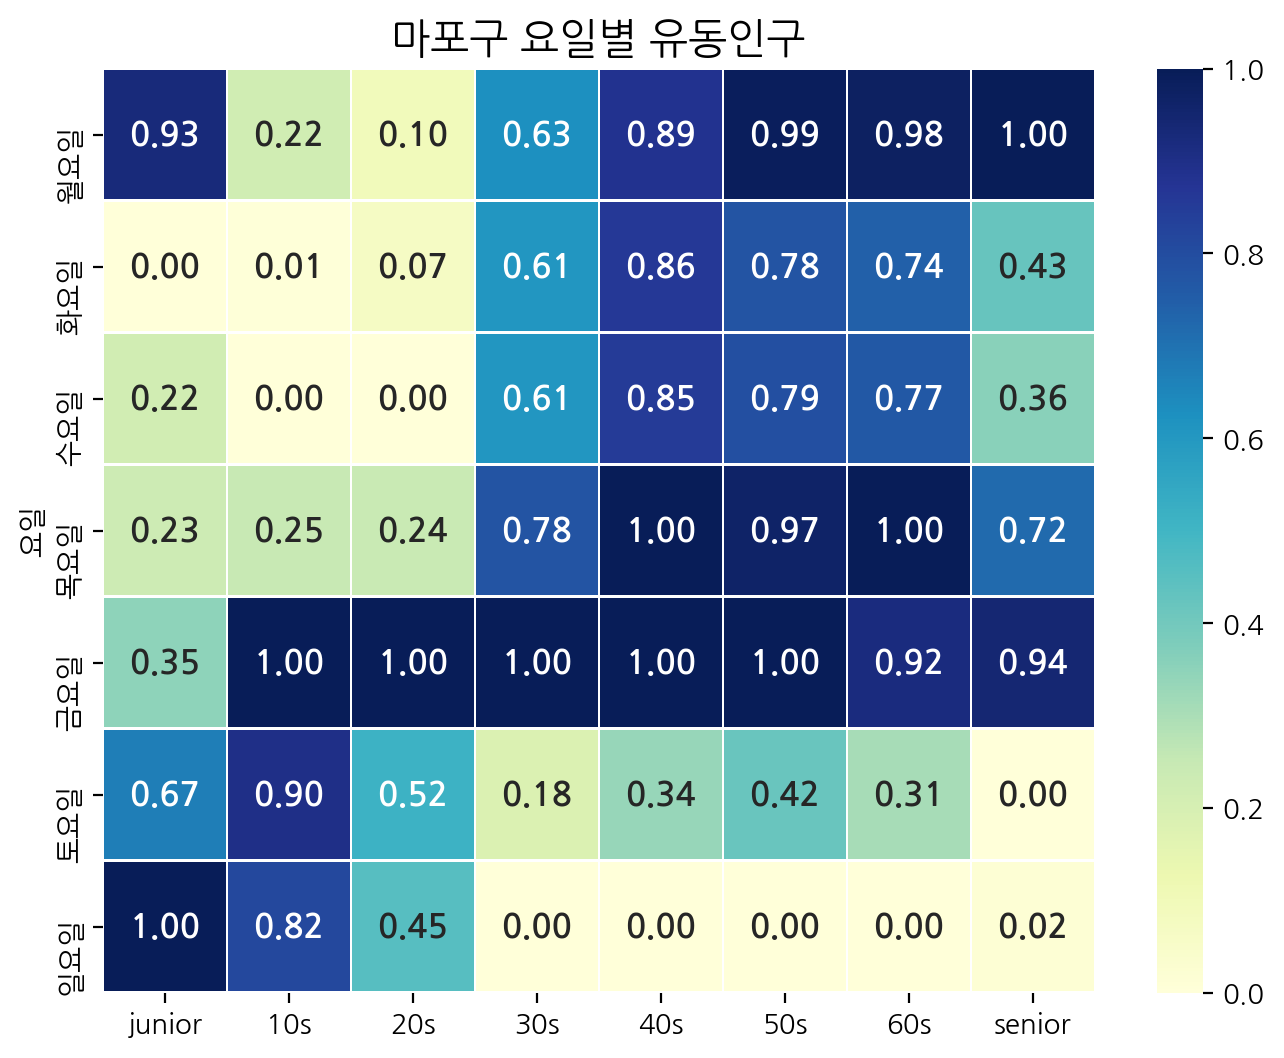

In [ ]:
sns_pv_day(tr_rank5,'마포구 요일별 유동인구')

In [ ]:
def traffic_injured(data,cn):
  cname=cn
  df=data.pivot_table(values="부상자수",index="발생년도", columns="요일", aggfunc=sum)
  df=df.sum(axis=0)
  df=pd.DataFrame(df)
  df.rename(columns={0:cname}, inplace=True)
  return df

In [ ]:
inj1=traffic_injured(tr_rank1, '강남구')
inj2=traffic_injured(tr_rank2, '송파구')
inj3=traffic_injured(tr_rank3, '서초구')
inj4=traffic_injured(tr_rank4, '영등포구')
inj5=traffic_injured(tr_rank5, '마포구')

In [ ]:
full_inj=pd.concat([inj1,inj2,inj3,inj4,inj5],axis=1)
full_inj #요일별 음주운전 부상자 수 => (2017-2019 합계) => 상위5개 지역

,강남구,송파구,서초구,영등포구,마포구
요일,,,,,
금요일,299,126,164,123,124
목요일,326,131,159,128,88
수요일,231,127,117,89,90
월요일,167,105,86,81,85
일요일,252,178,95,175,166
토요일,400,220,147,138,201
화요일,220,130,94,132,86


In [ ]:
def traffic_day(data,title):
  t=title
  df=data.groupby(['요일']).mean()
  df=pd.DataFrame(df)
  df=df['총생활인구수']
  df=pd.DataFrame(df)
  df.rename(columns={'총생활인구수':t}, inplace=True)
  df=df[t].round(0)
  df=pd.DataFrame(df)
  return df

In [ ]:
day1=traffic_day(tr_rank1,'강남구')
day2=traffic_day(tr_rank2,'송파구')
day3=traffic_day(tr_rank3,'서초구')
day4=traffic_day(tr_rank4,'영등포구')
day5=traffic_day(tr_rank5,'마포구')

In [ ]:
full_day=pd.concat([day1,day2,day3,day4,day5],axis=1)
full_day  #요일별 유동인구 수 => (2017-2019 합계) => 상위5개 지역

,강남구,송파구,서초구,영등포구,마포구
요일,,,,,
금요일,746511.0,753688.0,563680.0,451212.0,476026.0
목요일,762497.0,755640.0,573789.0,458816.0,466573.0
수요일,738601.0,756432.0,552214.0,453911.0,461015.0
월요일,750056.0,757021.0,556044.0,452845.0,464319.0
일요일,668741.0,745666.0,516676.0,431293.0,454981.0
토요일,697211.0,754740.0,539680.0,438524.0,460045.0
화요일,723038.0,752967.0,558956.0,455083.0,461511.0


In [ ]:
#sorted([ f.name for f in fm.fontManager.ttflist ])

In [ ]:
#full_day.plot(kind='bar',width=0.7, stacked=False)

## **요일별 음주운전 사고 관계 Visualization**
* 평일 특징: 유동인구와 음주운전 사고량이 비례하는 경향
* 주말 특징: 유동인구 대비 음주운전 사고량이 훨씬 더 높은 경향


In [ ]:
full_inj

,강남구,송파구,서초구,영등포구,마포구
요일,,,,,
금요일,299,126,164,123,124
목요일,326,131,159,128,88
수요일,231,127,117,89,90
월요일,167,105,86,81,85
일요일,252,178,95,175,166
토요일,400,220,147,138,201
화요일,220,130,94,132,86


In [ ]:
full_day

,강남구,송파구,서초구,영등포구,마포구
요일,,,,,
금요일,746511.0,753688.0,563680.0,451212.0,476026.0
목요일,762497.0,755640.0,573789.0,458816.0,466573.0
수요일,738601.0,756432.0,552214.0,453911.0,461015.0
월요일,750056.0,757021.0,556044.0,452845.0,464319.0
일요일,668741.0,745666.0,516676.0,431293.0,454981.0
토요일,697211.0,754740.0,539680.0,438524.0,460045.0
화요일,723038.0,752967.0,558956.0,455083.0,461511.0


In [ ]:
min_max_scaler=preprocessing.MinMaxScaler()  #(0,1) 사이의 값을 가지도록 스케일 조정
plot_inj=min_max_scaler.fit_transform(full_inj)
plot_inj=pd.DataFrame(plot_inj, index=full_inj.index, columns=full_inj.columns)
plot_inj=plot_inj.reindex(index=['월요일','화요일','수요일','목요일','금요일','토요일','일요일'])
plot_inj #요일별 음주운전 부상자수

,강남구,송파구,서초구,영등포구,마포구
요일,,,,,
월요일,0.000000,0.000000,0.000000,0.000000,0.000000
화요일,0.227468,0.217391,0.102564,0.542553,0.008621
수요일,0.274678,0.191304,0.397436,0.085106,0.043103
목요일,0.682403,0.226087,0.935897,0.500000,0.025862
금요일,0.566524,0.182609,1.000000,0.446809,0.336207
토요일,1.000000,1.000000,0.782051,0.606383,1.000000
일요일,0.364807,0.634783,0.115385,1.000000,0.698276


In [ ]:
plot_day=min_max_scaler.fit_transform(full_day) #(0,1) 사이의 값을 가지도록 스케일 조정
plot_day=pd.DataFrame(plot_day, index=full_day.index, columns=full_day.columns)
plot_day=plot_day.reindex(index=['월요일','화요일','수요일','목요일','금요일','토요일','일요일'])
plot_day #요일별 유동인구수

,강남구,송파구,서초구,영등포구,마포구
요일,,,,,
월요일,0.867304,1.000000,0.689300,0.783054,0.443716
화요일,0.579131,0.642977,0.740287,0.864368,0.310287
수요일,0.745126,0.948129,0.622240,0.821785,0.286719
목요일,1.000000,0.878380,1.000000,1.000000,0.550820
금요일,0.829494,0.706473,0.823000,0.723722,1.000000
토요일,0.303661,0.799119,0.402780,0.262726,0.240627
일요일,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
def full_fig(cname):
  plt.figure(figsize=(7,3))
  plt.plot(plot_inj.index, plot_inj[cname], 'ro-')
  plt.plot(plot_day.index, plot_day[cname], 'bo-')
  #plt.title('강남구 유동인구와 음주운전 부상자수(기준:요일)')
  plt.title('%s 유동인구와 음주운전 부상자수(기준:요일)' %cname)
  plt.xlabel('요일')
  plt.ylabel('rate')
  plt.legend(['부상자수','유동인구'])
  plt.show()

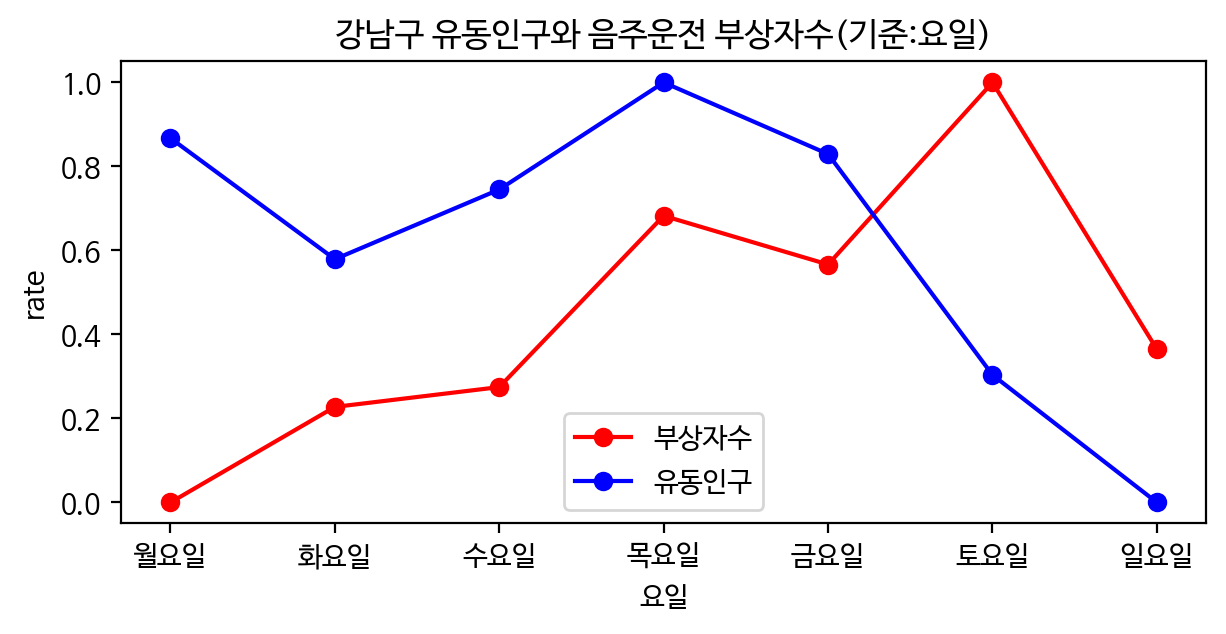

In [ ]:
full_fig('강남구')

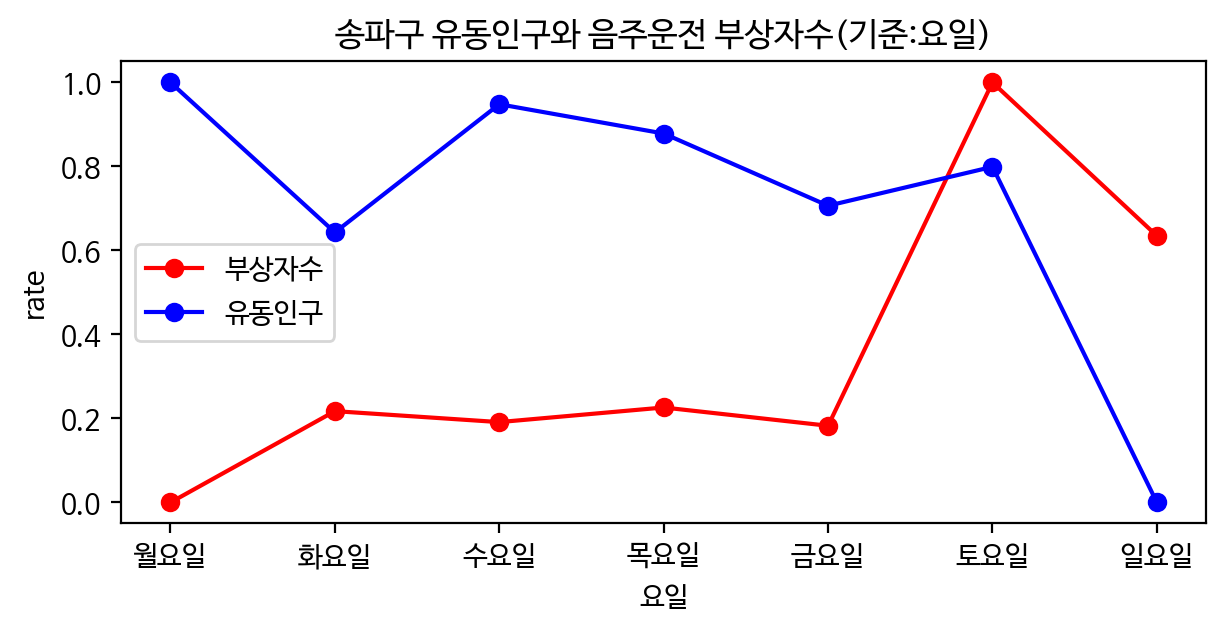

In [ ]:
full_fig('송파구')

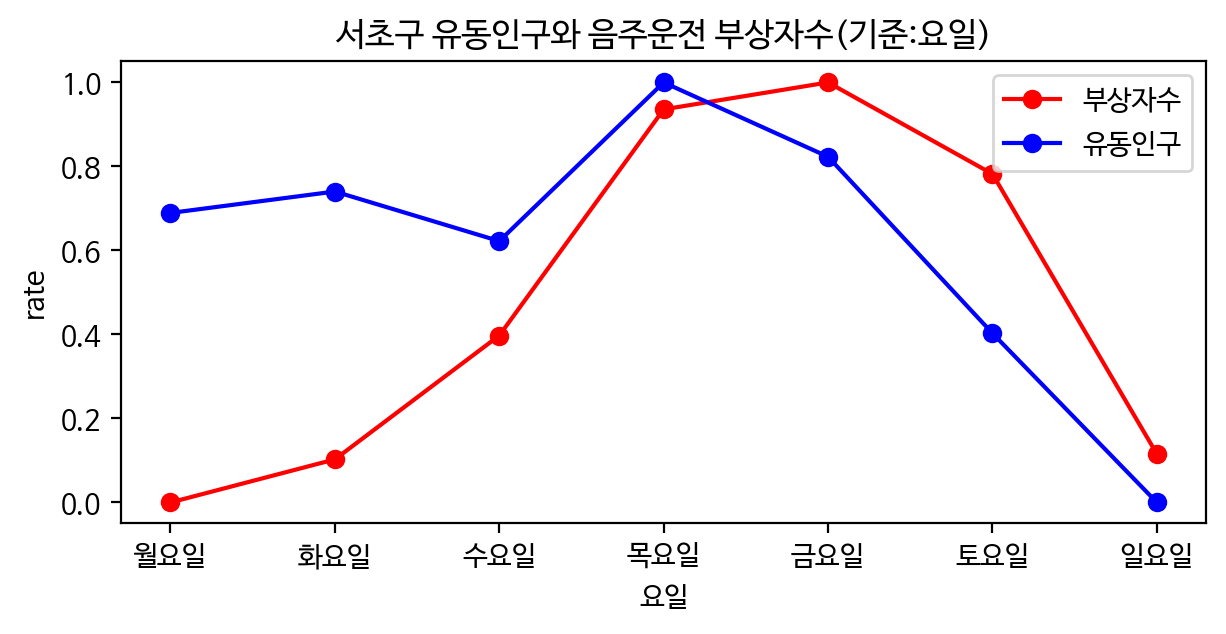

In [ ]:
full_fig('서초구')

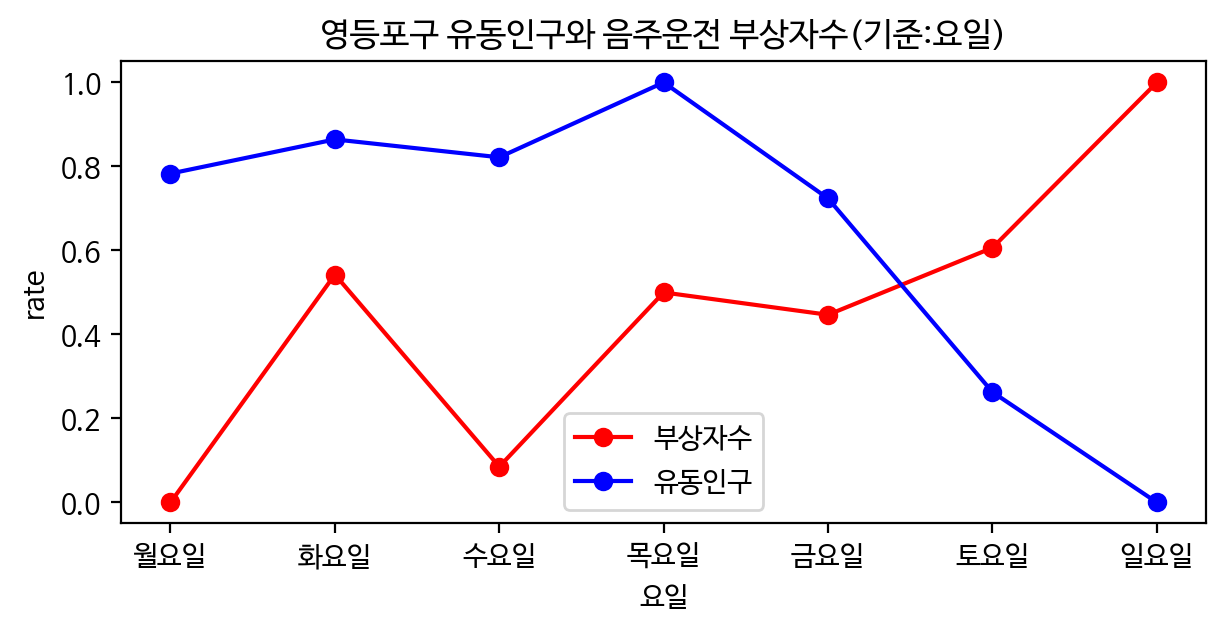

In [ ]:
full_fig('영등포구')

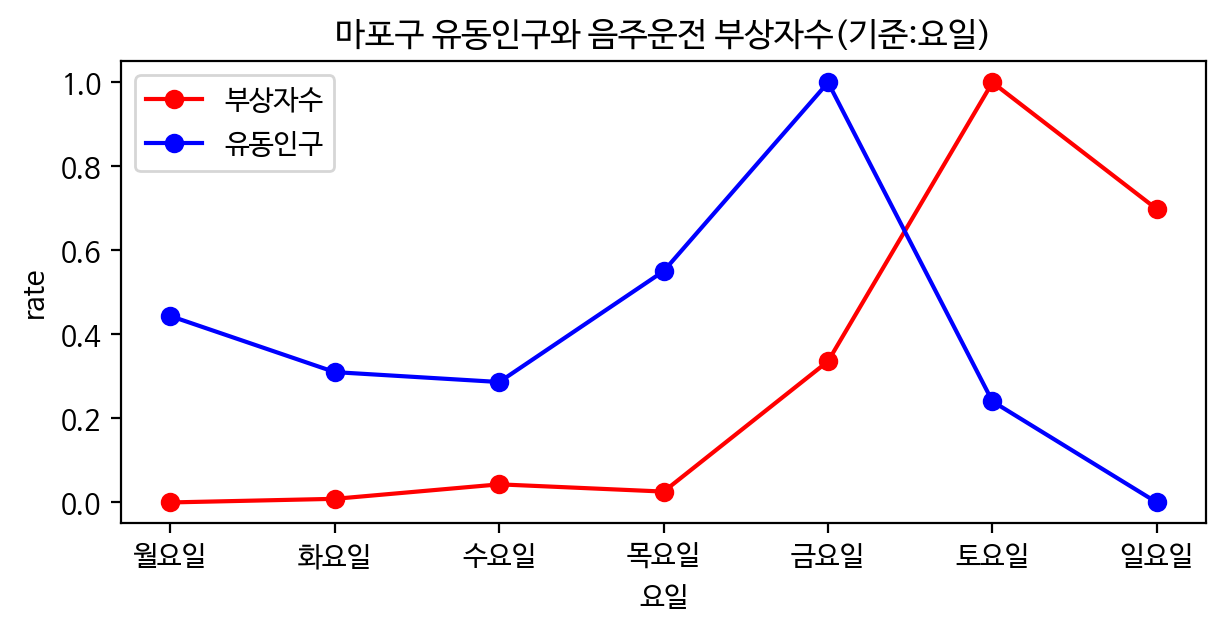

In [ ]:
full_fig('마포구')

## **Result**
* 시각화 결과, 지역별 및 요일별 유동인구 특징과 음주운전과의 연관성을 확인할 수 있었다.
* 이후 추가 데이터를 확보한다면 (지역별) 요일에 따른 음주운전 사고 예측이 가능할 것이다.
* 또한, 예측 결과를 활용하여 음주사고 예상 지역에 단속 강화를 할 수 있을 것으로 기대된다.